In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from PIL import Image

## Part 2: Segementing license characters

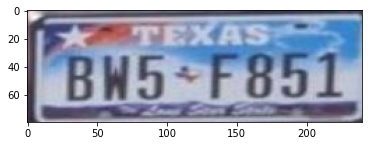

In [2]:
plate_image = cv2.imread("texas.jpg")
plt.imshow(plate_image)

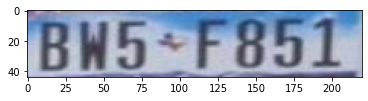

In [3]:
cropped = plate_image[25:69,20:250]
plt.imshow(cropped)

In [26]:
# convert to grayscale and blur the image
image = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# blur = cv2.GaussianBlur(gray,(7,7),0)
height = gray.shape[0]
width = gray.shape[1]

print(height, width)

44 220


In [69]:
binary = np.empty([height,width])

max_val = np.amax(gray)

for i in range(len(gray)):
    for j in range(len(gray[i])):
        if gray[i][j] > max_val*0.5:
            binary[i][j] = 255
        else:
            binary[i][j] = 0
            
            
# Applied inversed thresh_binary 
# binary = cv2.threshold(gray, 180, 255,
#                         cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# thre_mor = cv2.morphologyEx(binary, cv2.MORPH_DILATE, kernel3)



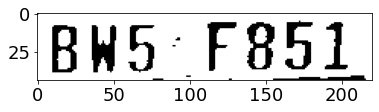

In [70]:
plt.imshow(binary, cmap='gray')

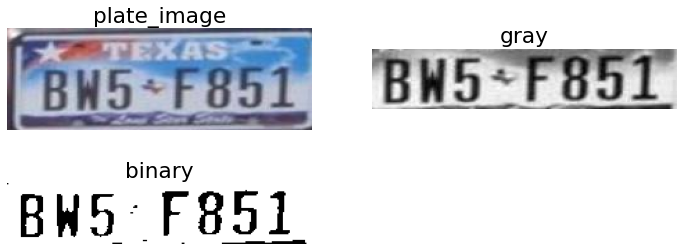

In [8]:
# visualize results    
fig = plt.figure(figsize=(12,7))
plt.rcParams.update({"font.size":18})
grid = gridspec.GridSpec(ncols=2,nrows=3,figure = fig)
plot_image = [plate_image, gray, binary]
plot_name = ["plate_image","gray","binary"]

for i in range(len(plot_image)):
    fig.add_subplot(grid[i])
    plt.axis(False)
    plt.title(plot_name[i])
    if i ==0:
        plt.imshow(plot_image[i])
    else:
        plt.imshow(plot_image[i],cmap="gray")


In [71]:
width = binary.shape[1]     
height = binary.shape[0] 
background = np.full([500,500],255)
y_low = 250-int(int(height)/2)
y_high = 250+int(int(height)/2)
x_low = 250-int(int(width)/2)
x_high = 250+int(int(width)/2)
print(height, width, x_low,x_high, y_low, y_high)

count_one =0
for i in range(y_low,y_high):
    count_two = 0
    for j in range(x_low,x_high):
        background[i][j]=binary[count_one][count_two]
        count_two += 1
    count_one +=1

# count_one =0
# for i in range(228, 272):
#     count_two=0
#     for j in range(140, 360):
#         background[i][j]= binary[count_one][count_two]
#         count_two+=1
#     count_one+=1

44 220 140 360 228 272


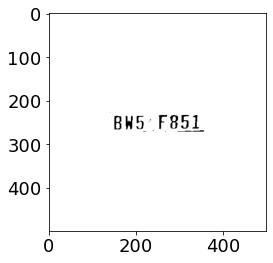

In [72]:
plt.imshow(background, cmap='gray')

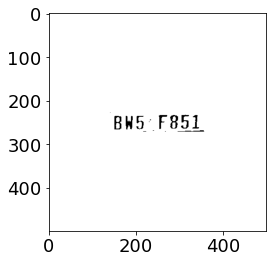

In [74]:
final_arr = np.zeros([500,500,3], np.uint8)
for i in range(500):
    for j in range(500):
        for k in range(3):
            final_arr[i][j][k]=background[i][j]

plt.imshow(final_arr)

In [76]:
x = Image.fromarray(final_arr)
x.save("binary.jpg")
# plt.imshow(x)

In [77]:
letters = os.popen("tesseract binary.jpg - -l eng").read()
print(letters)

BW5° F851



Estimating resolution as 402
